

---


# Tugas 8


---


Nama : Putri Tanaza Aji Pratiwi

Universitas Jenderal Soedirman

Kelas : Atlas



# Analisa 4W

<table>
  <tr>
    <th>Subjek:</th>
    <td>Pasien dengan rentang umur 30-80 tahun</td>
    <td>Who</td>
  </tr>
  <tr>
    <th>Punya masalah berupa:</th>
    <td>Mengalami beberapa gejala penyakit jantung koroner</td>
    <td>What</td>
  </tr>
  <tr>
    <th>Pada saat:</th>
    <td>Melaksanakan medical check up di rumah sakit</td>
    <td>Where</td>
  </tr>
  <tr>
    <th>Solusi idealnya:</th>
    <td>Perlu dilakukan pemodelan untuk memprediksi penyakit jantung dengan gejala yang dialami</td>
    <td>Why</td>
  </tr>
</table>

#Menentukan Algortima Yang Paling Efektif Dalam Memprediksi Penyakit Jantung#

Kerusakan atau penyakit pada pembuluh darah utama jantung disebut dengan penyakit jantung koroner.
Penyebabnya adalah penumpukan plak. Hal ini menyebabkan arteri koroner menyempit, membatasi aliran darah ke jantung.
Penyakit arteri koroner dapat berkisar dari tanpa gejala, nyeri dada, hingga serangan jantung.
Perawatan yang dapat dilakukan yaitu perubahan gaya hidup, obat-obatan, angioplasti, dan operasi. Ini mengaitkan banyak faktor risiko penyakit jantung dan kebutuhan waktu untuk mendapatkan pendekatan yang akurat, andal, dan masuk akal untuk membuat diagnosis dini sehingga penanggulangan penyakit ini dapat dilakukan dengan cepat. Dalam Tugas 8 ini saya ingin mencari tahu algoritma deep learning apa yang dapat diterapkan untuk mengolah data terkait dalam memprediksi penyakit jantung secara efektif.

# EDA

In [ ]:
!wget -O 'ZAlizadehdataset' "https://github.com/putritanaza/taskv/blob/main/ZAlizadehdataset.xlsx?raw=true"

--2022-03-19 09:29:39--  https://github.com/putritanaza/taskv/blob/main/ZAlizadehdataset.xlsx?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/putritanaza/taskv/raw/main/ZAlizadehdataset.xlsx [following]
--2022-03-19 09:29:39--  https://github.com/putritanaza/taskv/raw/main/ZAlizadehdataset.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/putritanaza/taskv/main/ZAlizadehdataset.xlsx [following]
--2022-03-19 09:29:39--  https://raw.githubusercontent.com/putritanaza/taskv/main/ZAlizadehdataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent

In [ ]:
!ls

sample_data  ZAlizadehdataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
#print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_excel("ZAlizadehdataset")
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [ ]:
data.shape

(303, 56)

In [ ]:
data.isnull().values.any()

False

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head(10)

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
5,50,75,175,Male,24.489796,0,0,1,0,0,...,4.2,141,7300,26,66,194,50,0,N,Cad
6,55,80,165,Male,29.384757,0,0,0,1,0,...,4.8,139,9400,58,33,292,40,4,mild,Cad
7,72,80,175,Male,26.122449,1,0,1,0,0,...,4.3,142,12200,25,74,410,45,4,mild,Cad
8,58,84,163,Fmale,31.615793,0,0,0,0,0,...,3.4,139,5100,49,50,370,50,0,N,Normal
9,60,71,170,Male,24.567474,1,0,0,0,0,...,4.6,140,4900,55,42,380,40,2,N,Cad


In [ ]:
from sklearn.preprocessing import LabelEncoder

for f in data.columns:
    if data[f].dtype == 'object':
        print (f)

        lbl = LabelEncoder()
        lbl.fit(list(data[f].values))

        data[f] = lbl.transform(list(data[f].values))

Sex
Obesity
CRF
CVA
Airway disease
Thyroid Disease
CHF
DLP
Weak Peripheral Pulse
Lung rales
Systolic Murmur
Diastolic Murmur
Dyspnea
Atypical
Nonanginal
Exertional CP
LowTH Ang
LVH
Poor R Progression
BBB
VHD
Cath


In [ ]:
data.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'Cath'],
      dtype='object')

In [ ]:
X = data.drop(columns=['Cath'], axis=1) 
y = data['Cath']

X.shape, y.shape

((303, 55), (303,))

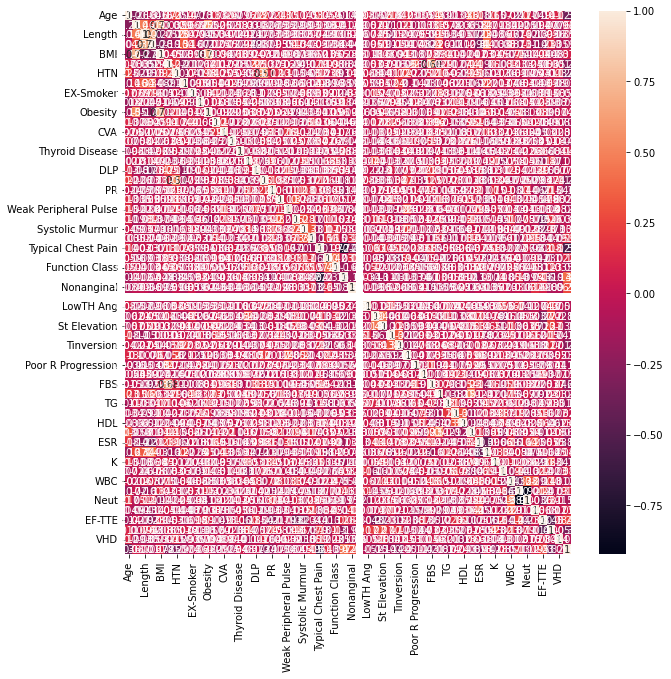

In [ ]:
corr = data.corr()
top_corr = corr.index

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
corr_plot = sns.heatmap(data[top_corr].corr(), annot=True)

In [ ]:
data.tail(5)

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
298,58,84,168,1,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,1,0
299,55,64,152,0,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,3,1
300,48,77,160,0,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,1,1
301,57,90,159,0,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,1,1
302,56,85,170,0,29.411765,0,1,1,0,0,...,4.4,147,6000,32,55,302,55,0,1,0


In [ ]:
data.sample(5)

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
198,64,64,152,0,27.700831,0,1,0,0,0,...,4.4,142,6700,31,64,25,45,0,3,0
81,55,76,170,1,26.297578,0,0,1,0,1,...,5.6,131,5500,22,65,232,25,3,3,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
249,54,68,166,1,24.677021,0,1,0,1,0,...,4.0,139,6600,28,65,174,25,0,0,0
181,65,65,160,0,25.390625,1,0,0,0,0,...,4.5,134,14700,40,49,354,30,0,3,0


In [ ]:
data.describe()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,0.580858,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,...,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462,1.930693,0.287129
std,10.392278,11.987358,9.327661,0.494235,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,...,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531,1.109180,0.453171
min,30.000000,48.000000,140.000000,0.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000,0.000000,0.000000
25%,51.000000,65.000000,158.000000,0.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000,1.000000,0.000000
50%,58.000000,74.000000,165.000000,1.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,...,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000,2.000000,0.000000
75%,66.000000,81.000000,171.000000,1.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,...,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000,3.000000,1.000000
max,86.000000,120.000000,188.000000,1.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000,3.000000,1.000000


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

sel = SelectFromModel(ExtraTreesClassifier(n_estimators=100))
sel.fit(X, y)

sel_feat = X.columns[(sel.get_support())]

print('Total fitur:', len(X.columns))
print('Jumlah fitur yang dipilih:', len(sel_feat))
print('Fitur yang dipilih:\n', sel_feat)

Total fitur: 55
Jumlah fitur yang dipilih: 17
Fitur yang dipilih:
 Index(['Age', 'Weight', 'BMI', 'DM', 'HTN', 'BP', 'Typical Chest Pain',
       'Atypical', 'Nonanginal', 'Tinversion', 'FBS', 'TG', 'ESR', 'K', 'PLT',
       'EF-TTE', 'Region RWMA'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

# Pemodelan

In [ ]:
info = ["age", "weight", "length", "1: male, 0: female", "bmi", "diabetmelitus", "hypertension", "smoker", "exsmoker", "famhis", "bmi > 25", "chronic renal failure", "cerebrovascul accident", "airway disease", "thyroid disease", "coongestive heart failure", "dyslipidemia", "blood pressure", "pulse rate", "edema", "weak pheriperal pulse", "lungrates", "sytolic", "diastolic", "chest pain, 0: typical angina, 1: atypical angina", "dyspena", "(function values 1,2,3,4", "atypical", "nonanginal cp", "extertional cp", "low th", "rhythm", "qwave", "st elevation", "st depression", "t inversion", "lvh", "poor r wave", "fasting blood sugar", "creatine", "triglyceride", "ldl", "hdl", "bun", "esr", "hemoglobin", "potassium", "sodium", "white blood cell", "lymph", "neut", "plt", "ef", "region rwma", "vhd"]

for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

Age:			age
Weight:			weight
Length:			length
Sex:			1: male, 0: female
BMI:			bmi
DM:			diabetmelitus
HTN:			hypertension
Current Smoker:			smoker
EX-Smoker:			exsmoker
FH:			famhis
Obesity:			bmi > 25
CRF:			chronic renal failure
CVA:			cerebrovascul accident
Airway disease:			airway disease
Thyroid Disease:			thyroid disease
CHF:			coongestive heart failure
DLP:			dyslipidemia
BP:			blood pressure
PR:			pulse rate
Edema:			edema
Weak Peripheral Pulse:			weak pheriperal pulse
Lung rales:			lungrates
Systolic Murmur:			sytolic
Diastolic Murmur:			diastolic
Typical Chest Pain:			chest pain, 0: typical angina, 1: atypical angina
Dyspnea:			dyspena
Function Class:			(function values 1,2,3,4
Atypical:			atypical
Nonanginal:			nonanginal cp
Exertional CP:			extertional cp
LowTH Ang:			low th
Q Wave:			rhythm
St Elevation:			qwave
St Depression:			st elevation
Tinversion:			st depression
LVH:			t inversion
Poor R Progression:			lvh
BBB:			poor r wave
FBS:			fasting blood sugar
CR:			creatine

In [ ]:
data["Cath"].describe()

count    303.000000
mean       0.287129
std        0.453171
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Cath, dtype: float64

In [ ]:
data["Cath"].unique()

array([0, 1])

In [ ]:
print(data.corr()["Cath"].abs().sort_values(ascending=False))

Cath                     1.000000
Typical Chest Pain       0.542967
Atypical                 0.415922
Age                      0.357247
Region RWMA              0.316011
HTN                      0.287761
Nonanginal               0.274184
DM                       0.252897
BP                       0.237762
Tinversion               0.236933
EF-TTE                   0.234009
FBS                      0.205553
K                        0.181320
ESR                      0.178447
PR                       0.168366
Q Wave                   0.149848
Diastolic Murmur         0.146777
St Depression            0.144426
TG                       0.140593
St Elevation             0.139684
Lymph                    0.126945
Dyspnea                  0.125211
Neut                     0.124086
Poor R Progression       0.111040
Function Class           0.097087
PLT                      0.094888
CRF                      0.090205
BUN                      0.088903
CR                       0.086758
Na            

0    216
1     87
Name: Cath, dtype: int64


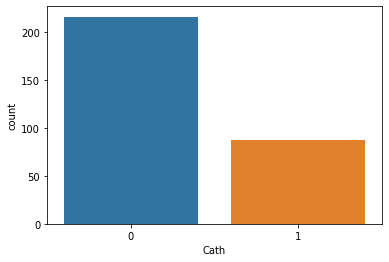

In [ ]:
y = data["Cath"]
sns.countplot(y)
Cath_temp = data.Cath.value_counts()

print(Cath_temp)

In [ ]:
value="Dapat dilihat dari diagram batang diatas value 0 lebih tinggi dari 1"
print(value)

Dapat dilihat dari diagram batang diatas value 0 lebih tinggi dari 1


In [ ]:
print("Persentasi pasien dengan jantung yang tidak bermasalah: "+str(round(Cath_temp[0]*100/303,2))+"%")
print("Persentasi pasien dengan jantung yang bermasalah: "+str(round(Cath_temp[1]*100/303,2))+"%")

Persentasi pasien dengan jantung yang tidak bermasalah: 71.29%
Persentasi pasien dengan jantung yang bermasalah: 28.71%


In [ ]:
data["Sex"].unique()

array([1, 0])

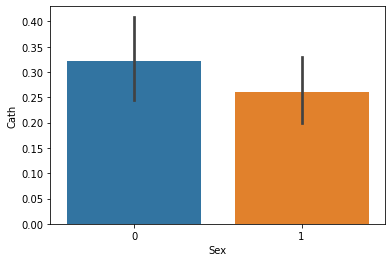

In [ ]:
sns.barplot(data["Sex"],y)

In [ ]:
data["Function Class"].unique()

array([0, 3, 2, 1])

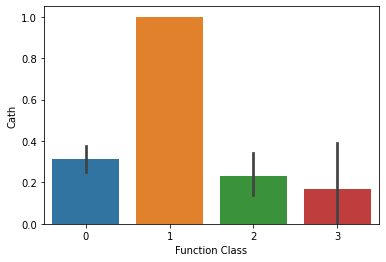

In [ ]:
sns.barplot(data["Function Class"],y)

In [ ]:
data["Q Wave"].describe()

count    303.000000
mean       0.052805
std        0.224015
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Q Wave, dtype: float64

In [ ]:
data["Q Wave"].unique()

array([0, 1])

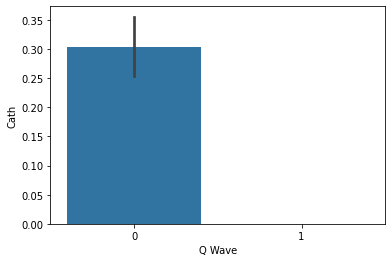

In [ ]:
sns.barplot(data["Q Wave"],y)

In [ ]:
data["Region RWMA"].unique()

array([0, 4, 2, 3, 1])

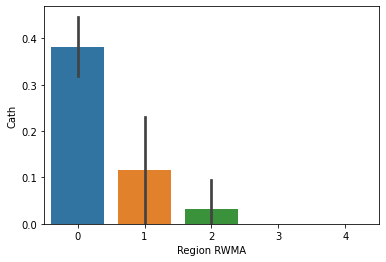

In [ ]:
sns.barplot(data["Region RWMA"],y)

In [ ]:
data["EX-Smoker"].unique()

array([0, 1])

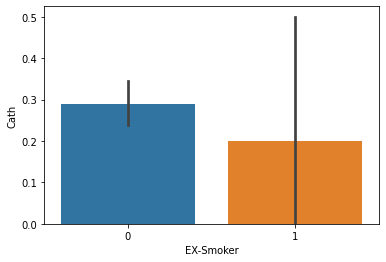

In [ ]:
sns.barplot(data["EX-Smoker"],y)

In [ ]:
data["CR"].unique()

array([0.7 , 1.  , 1.2 , 0.8 , 0.9 , 0.6 , 1.3 , 1.1 , 1.9 , 1.5 , 1.15,
       0.5 , 1.4 , 2.2 , 1.8 , 2.  , 1.6 , 1.7 ])

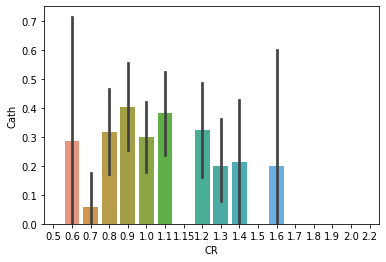

In [ ]:
sns.barplot(data["CR"],y)

In [ ]:
data["Typical Chest Pain"].unique()

array([0, 1])

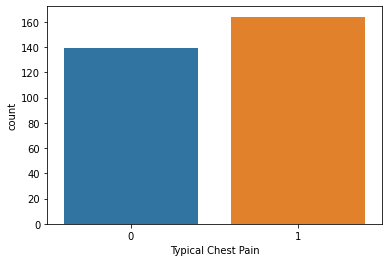

In [ ]:
sns.countplot(data["Typical Chest Pain"])

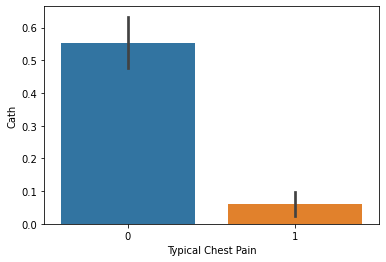

In [ ]:
sns.barplot(data["Typical Chest Pain"],y)

In [ ]:
data["K"].unique()

array([4.7, 4.4, 4. , 4.2, 4.8, 4.3, 3.4, 4.6, 4.5, 3.5, 3.8, 3.6, 4.9,
       5. , 3.2, 5.1, 3.9, 5.4, 4.1, 3.3, 3.7, 6.6, 5.3, 5.6, 3.1, 5.2,
       3. ])

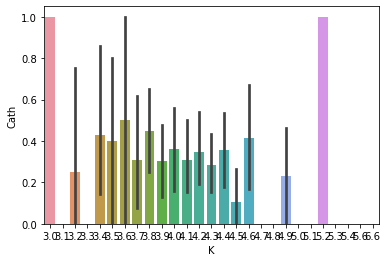

In [ ]:
sns.barplot(data["K"],y)

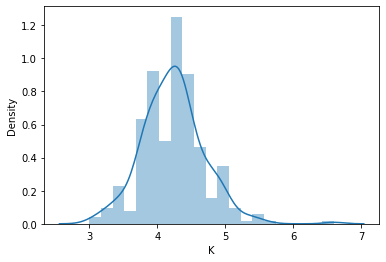

In [ ]:
sns.distplot(data["K"])

In [ ]:
from sklearn.model_selection import train_test_split

predictors = data.drop("Cath",axis=1)
Cath = data["Cath"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,Cath,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 55)

In [ ]:
X_test.shape

(61, 55)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

# Evaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan Regresi Logistik adalah: "+str(score_lr)+" %")

Skor ketepatan yang dicapai menggunakan Regresi Logistik adalah: 77.05 %


In [ ]:
from sklearn.naive_bayes import GaussianNB # Naive Bayes

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan  Naive Bayes adalah: "+str(score_nb)+" %")

Skor ketepatan yang dicapai menggunakan  Naive Bayes adalah: 73.77 %


In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

(61,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("Skor ketepatan yang dicapai menggunakan  SVM adalah: "+str(score_svm)+" %")

Skor ketepatan yang dicapai menggunakan  SVM adalah: 85.25 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(61,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("Skor ketepatan yang dicapai menggunakan K-Nearest Neighbors adalah: "+str(score_knn)+" %")

Skor ketepatan yang dicapai menggunakan K-Nearest Neighbors adalah: 72.13 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)

(61,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan Decision Tree adalah: "+str(score_dt)+" %")

Skor ketepatan yang dicapai menggunakan Decision Tree adalah: 91.8 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(1000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan Random Forest adalah: "+str(score_rf)+" %")

Skor ketepatan yang dicapai menggunakan Random Forest adalah: 93.44 %


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb.shape

(61,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan XGBoost adalah: "+str(score_xgb)+" %")

Skor ketepatan yang dicapai menggunakan XGBoost adalah: 83.61 %


In [ ]:
#!pip3 install tensorflow
import sys

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=55))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=1000)

Epoch 1/1000
8/8 [==============================] - 3s 5ms/step - loss: 1438.3646 - accuracy: 0.2893
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 1340.5055 - accuracy: 0.2893
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 1244.3562 - accuracy: 0.2893
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 1151.0320 - accuracy: 0.2893
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 1057.7606 - accuracy: 0.2893
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 967.6174 - accuracy: 0.2893
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 877.1939 - accuracy: 0.2893
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 791.6592 - accuracy: 0.2893
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 703.7710 - accuracy: 0.2893
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 619.6005 - accuracy: 0

In [ ]:
Y_pred_nn = model.predict(X_test)

In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan Neural Network adalah: "+str(score_nn)+" %")

Skor ketepatan yang dicapai menggunakan Neural Network adalah: 86.89 %


In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("Skor akurasi yang dicapai oleh algoritma "+algorithms[i]+" adalah: "+str(scores[i])+" %")

Skor akurasi yang dicapai oleh algoritma Logistic Regression adalah: 77.05 %
Skor akurasi yang dicapai oleh algoritma Naive Bayes adalah: 73.77 %
Skor akurasi yang dicapai oleh algoritma Support Vector Machine adalah: 85.25 %
Skor akurasi yang dicapai oleh algoritma K-Nearest Neighbors adalah: 72.13 %
Skor akurasi yang dicapai oleh algoritma Decision Tree adalah: 91.8 %
Skor akurasi yang dicapai oleh algoritma Random Forest adalah: 93.44 %
Skor akurasi yang dicapai oleh algoritma XGBoost adalah: 83.61 %
Skor akurasi yang dicapai oleh algoritma Neural Network adalah: 86.89 %


##Kesimpulan##
Dalam tugas ini, hanya mempertimbangkan beberapa faktor saja. Tujuan hanya diambil beberapa faktor saja karena dirasa lebih efisien dan akurat. Tujuan keseluruhannya adalah untuk menentukan berbagai teknik pengolahan data yang paling efektif dalam memprediksi penyakit jantung. Telah dilakukan teknik klasifikasi data mining, seperti Logistic Regression, Naive Bayes, Support Vector Machine,K-Nearest Neighbors, Decision Tree, Random Forest, XGBoost dan Neural Network. Dapat disimpulkan bahwa akurasi tertinggi yaitu random forest sebesar 93.44%. Selanjutnya dapat memperluas penelitian ini dengan menggabungkan teknik penambangan data lainnya seperti deret waktu, aturan pengelompokan dan asosiasi, mesin vektor pendukung, dan algoritma genetika.



nb:
https://colab.research.google.com/drive/1K42rQ7MfhIBsEczaWNz5wIWS_a4tGqSp?usp=sharing